In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import itertools
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import warnings

In [ ]:
os.chdir('C:/Users/tajam/Blend/MachineLearning/datasets/dogs_vs_cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'),500):
    shutil.move(c,'train/cat')
for c in random.sample(glob.glob('dog*'),500):
    shutil.move(c,'train/dog')
for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')
for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')
for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/cat')
for c in random.sample(glob.glob('dog*'),50):
    shutil.move(c,'test/dog')



In [3]:
train_path = 'datasets/dogsvscats/train'
valid_path = 'datasets/dogsvscats/valid'
test_path = 'datasets/dogsvscats/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
assert train_batches.n == 1000
assert test_batches.n == 100
assert valid_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes

In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

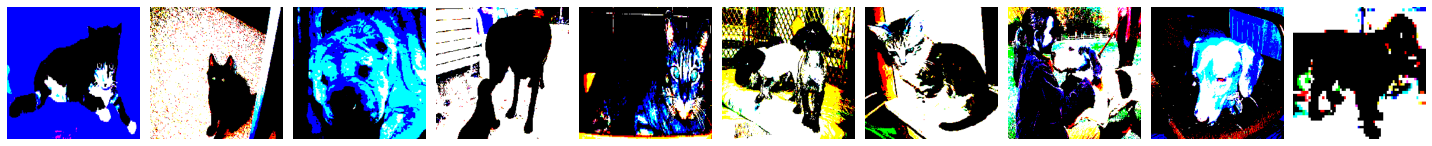

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

Build and Train a CNN

In [9]:
model = Sequential([
                Conv2D(filters=32, kernel_size=(3,3),activation ='relu',padding='same', input_shape=(224,224,3)),
                MaxPool2D(pool_size=(2,2),strides=2),
                Conv2D(filters=64, kernel_size=(3,3),activation ='relu',padding='same'),
                MaxPool2D(pool_size=(2,2),strides=2),
                Flatten(),
                Dense(units=2,activation='softmax'),

])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
100/100 - 33s - loss: 0.1510 - accuracy: 0.9590 - val_loss: 2.6906 - val_accuracy: 0.6350 - 33s/epoch - 327ms/step
Epoch 2/10
100/100 - 32s - loss: 0.0390 - accuracy: 0.9850 - val_loss: 2.4575 - val_accuracy: 0.6500 - 32s/epoch - 320ms/step
Epoch 3/10
100/100 - 32s - loss: 0.0062 - accuracy: 0.9980 - val_loss: 2.3112 - val_accuracy: 0.6700 - 32s/epoch - 320ms/step
Epoch 4/10
100/100 - 32s - loss: 5.6319e-04 - accuracy: 1.0000 - val_loss: 2.2806 - val_accuracy: 0.6600 - 32s/epoch - 319ms/step
Epoch 5/10
100/100 - 32s - loss: 3.5489e-04 - accuracy: 1.0000 - val_loss: 2.2800 - val_accuracy: 0.6700 - 32s/epoch - 319ms/step
Epoch 6/10
100/100 - 33s - loss: 2.7609e-04 - accuracy: 1.0000 - val_loss: 2.2819 - val_accuracy: 0.6750 - 33s/epoch - 331ms/step
Epoch 7/10
100/100 - 33s - loss: 2.3502e-04 - accuracy: 1.0000 - val_loss: 2.2719 - val_accuracy: 0.6750 - 33s/epoch - 327ms/step
Epoch 8/10
100/100 - 33s - loss: 2.0550e-04 - accuracy: 1.0000 - val_loss: 2.2727 - val_accuracy: 0.67

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

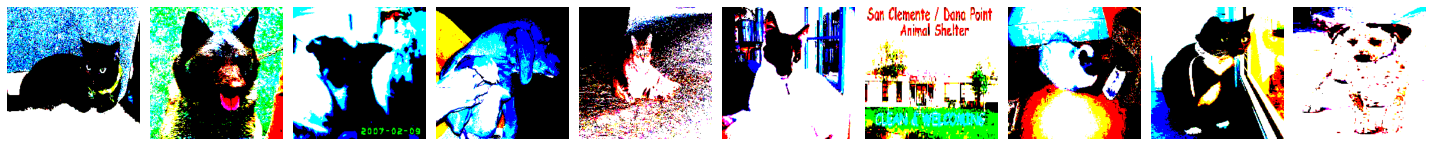

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [13]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
predictions = model.predict(x=test_batches, verbose=0)


In [16]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [17]:
cm =confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

<AxesSubplot:>

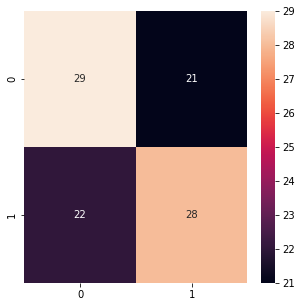

In [18]:
from seaborn import heatmap
plt.figure(figsize=(5,5))
heatmap(cm,annot=True, fmt='d')

Build 

In [19]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [20]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
vmodel = Sequential()
for layer in vgg16_model.layers[:-1]:
    vmodel.add(layer)

In [22]:
vmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [23]:
for layer in vmodel.layers:
    layer.trainable = False

In [24]:
vmodel.add(Dense(units=2, activation ='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [26]:
imgs, labels = next(train_batches)

In [27]:
vmodel.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
vmodel.fit(x=train_batches, validation_data= valid_batches, epochs=50, verbose= 2)

Epoch 1/50
100/100 - 110s - loss: 0.3613 - accuracy: 0.8590 - val_loss: 0.1295 - val_accuracy: 0.9400 - 110s/epoch - 1s/step
Epoch 2/50
100/100 - 109s - loss: 0.0992 - accuracy: 0.9630 - val_loss: 0.1006 - val_accuracy: 0.9550 - 109s/epoch - 1s/step
Epoch 3/50
100/100 - 108s - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0918 - val_accuracy: 0.9550 - 108s/epoch - 1s/step
Epoch 4/50
100/100 - 108s - loss: 0.0429 - accuracy: 0.9850 - val_loss: 0.0887 - val_accuracy: 0.9600 - 108s/epoch - 1s/step
Epoch 5/50
100/100 - 109s - loss: 0.0326 - accuracy: 0.9910 - val_loss: 0.0834 - val_accuracy: 0.9550 - 109s/epoch - 1s/step
Epoch 6/50
100/100 - 110s - loss: 0.0249 - accuracy: 0.9970 - val_loss: 0.0827 - val_accuracy: 0.9600 - 110s/epoch - 1s/step
Epoch 7/50
100/100 - 107s - loss: 0.0199 - accuracy: 0.9990 - val_loss: 0.0806 - val_accuracy: 0.9550 - 107s/epoch - 1s/step
Epoch 8/50
100/100 - 108s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9600 - 108s/epoch - 1s/step


In [34]:
vpredictions = vmodel.predict(x=test_batches, verbose=0)

In [30]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:

vcm = confusion_matrix(y_true = test_batches.classes, y_pred=np.argmax(vpredictions, axis=-1))
vcm

array([[26, 24],
       [23, 27]], dtype=int64)

In [32]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

<AxesSubplot:>

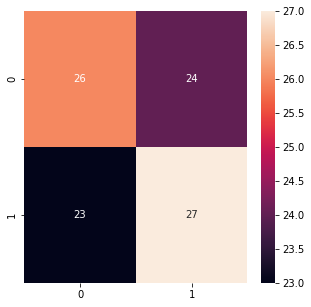

In [36]:
plt.figure(figsize=(5,5))
heatmap(vcm,annot=True,fmt='d')